In [15]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [16]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [21]:
PATH = "AI6-wk1-refresher/data_test/"

In [22]:
sz=224

In [23]:
!ls {PATH}

models	train  valid


In [24]:
!ls {PATH}valid

bender	homer


In [25]:
files = !ls {PATH}valid/bender | head
files

['bender.11.jpg',
 'bender.12.jpg',
 'bender.13.jpg',
 'bender.14.jpg',
 'bender.15.jpg',
 'bender.16.jpg',
 'bender.17.jpg',
 'bender.18.jpg',
 'bender.19.jpg',
 'bender.20.jpg']

In [58]:
!ls {PATH}train/homer | head

homer.01.jpg
homer.02.jpg
homer.03.jpg
homer.04.jpg
homer.05.jpg
homer.06.jpg
homer.07.jpg
homer.08.jpg
homer.09.jpg
homer.10.jpg


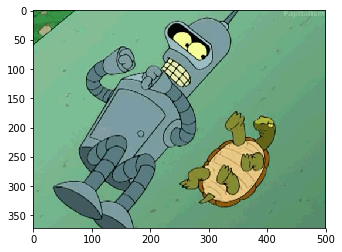

In [26]:
# https://matplotlib.org/users/image_tutorial.html
img = plt.imread(f'{PATH}valid/bender/{files[0]}')
plt.imshow(img);

In [9]:
img.shape

(372, 500, 3)

In [10]:
img[:4,:4]

array([[[ 58, 130,  57],
        [ 66, 139,  66],
        [ 63, 141,  65],
        [ 48, 131,  53]],

       [[ 69, 142,  71],
        [ 62, 138,  64],
        [ 57, 135,  60],
        [ 51, 133,  57]],

       [[ 67, 142,  73],
        [ 54, 131,  61],
        [ 50, 130,  57],
        [ 56, 140,  65]],

       [[ 34, 113,  47],
        [ 34, 114,  45],
        [ 45, 126,  57],
        [ 59, 142,  70]]], dtype=uint8)

In [27]:
# Uncomment the below if you need to reset your precomputed activations
# !rm -rf {PATH}tmp

In [28]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

In [60]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 100)

HBox(children=(IntProgress(value=0, description='Epoch'), HTML(value='')))

[ 0.       0.81812  0.66348  0.6    ]            
[ 1.       0.8652   0.58258  0.7    ]            
[ 2.       0.76991  0.50087  0.8    ]           
[ 3.       0.64819  0.44095  0.85   ]            
[ 4.       0.55375  0.39887  0.9    ]            
[ 5.       0.46852  0.37056  0.9    ]            
[ 6.       0.40165  0.35077  0.8    ]            
[ 7.       0.35062  0.33511  0.8    ]            
[ 8.       0.31323  0.3249   0.8    ]            
[ 9.       0.27986  0.31789  0.8    ]           
[ 10.        0.25242   0.31368   0.8    ]        
[ 11.        0.22946   0.31004   0.8    ]        
[ 12.        0.21109   0.30497   0.85   ]        
[ 13.        0.19427   0.30208   0.85   ]        
[ 14.        0.17972   0.29637   0.85   ]       
[ 15.        0.1668    0.29416   0.85   ]        
[ 16.        0.15539   0.28835   0.85   ]        
[ 17.        0.14531   0.28319   0.85   ]        
[ 18.        0.13627   0.28126   0.85   ]        
[ 19.        0.12812   0.27667   0.9    ]        
[ 2

In [61]:
learn.save('model')

In [62]:
learn.load('model')

In [63]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [64]:
# from here we know that 'bender' is label 0 and 'homer' is label 1.
data.classes

['bender', 'homer']

In [65]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(20, 2)

In [66]:
log_preds[:10]

array([[-0.03286, -3.43193],
       [-0.6952 , -0.6911 ],
       [-0.00298, -5.8181 ],
       [-1.07973, -0.41504],
       [-0.22444, -1.60426],
       [-0.00024, -8.32659],
       [-0.02493, -3.70419],
       [-0.22366, -1.60737],
       [-0.00489, -5.32339],
       [-0.04318, -3.16386]], dtype=float32)

In [67]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])   

In [68]:
def rand_by_mask(mask): 
    return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): 
    return rand_by_mask((preds == data.val_y)==is_correct)

In [69]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [70]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [71]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


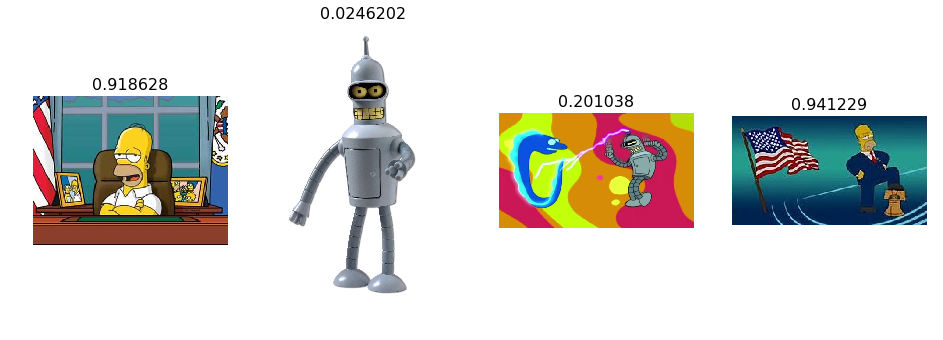

In [72]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


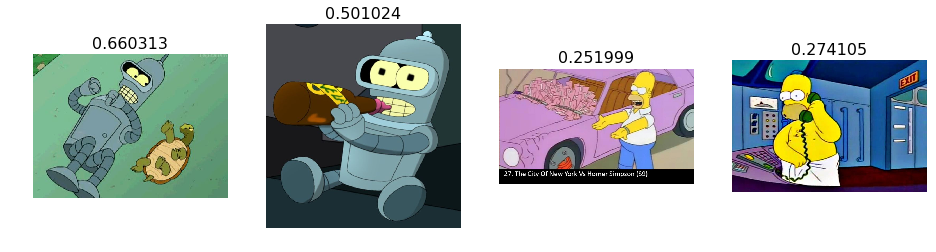

In [73]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [74]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Most correct bender


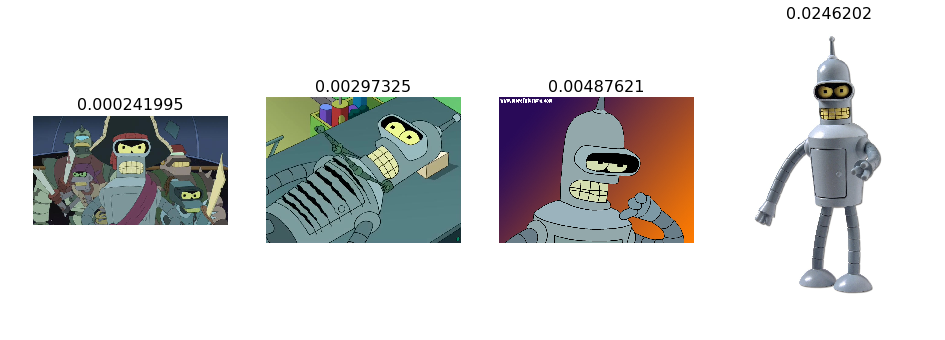

In [76]:
plot_val_with_title(most_by_correct(0, True), "Most correct bender")

Most correct homer


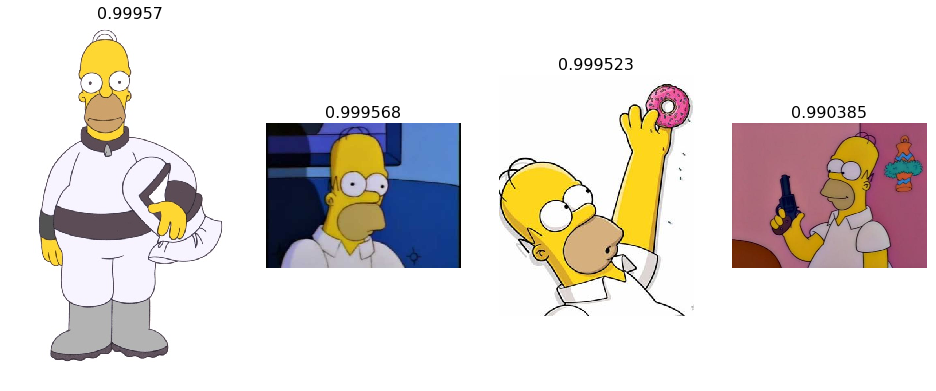

In [77]:
plot_val_with_title(most_by_correct(1, True), "Most correct homer")

Most incorrect homer


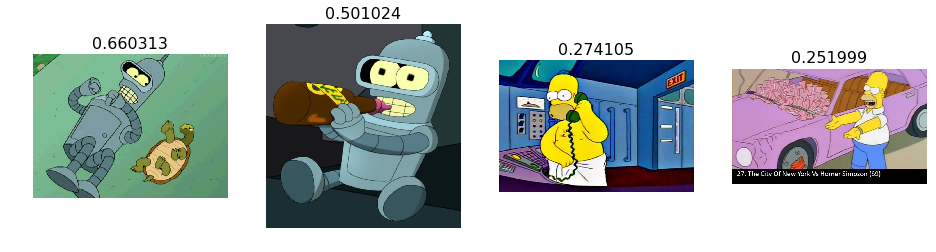

In [78]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect homer")

Most incorrect homer


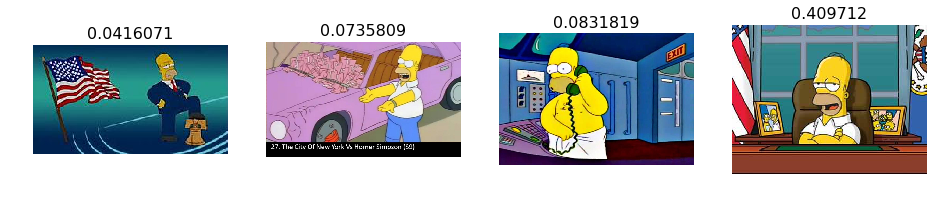

In [31]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect homer")

Most uncertain predictions


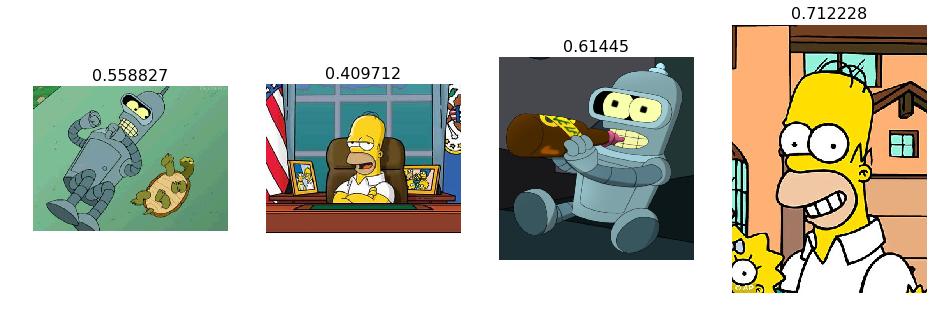

In [32]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")